In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic.csv


In [6]:
import matplotlib.pyplot as plt 
import seaborn as sns  

In [7]:
df=pd.read_csv("/kaggle/input/titanic-dataset/Titanic.csv")
df.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [8]:
df.isnull().sum() 

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


## Univariate Analysis of the dataset

Pclass
1    355
2    326
3    319
Name: count, dtype: int64


<Axes: xlabel='Pclass', ylabel='count'>

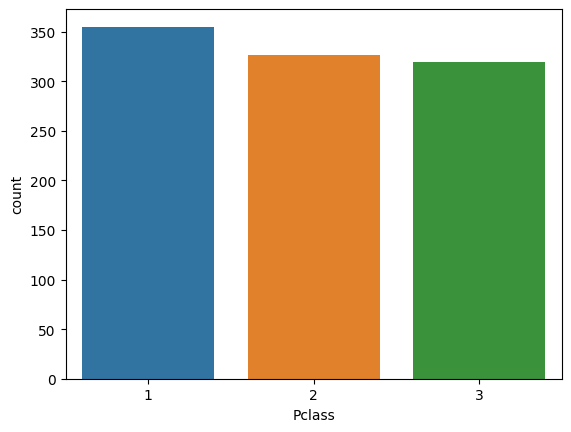

In [10]:
# passenge class feature is integer type but it can be seen as labeled integer type or discrete numerical type also
print(df["Pclass"].value_counts()) 


sns.countplot(data=df,x="Pclass") 

In [38]:
#converting Pclass to object type since it is discrete 
df["Pclass"]=df["Pclass"].astype("object") 

Sex
male      527
female    473
Name: count, dtype: int64


<Axes: xlabel='Sex', ylabel='count'>

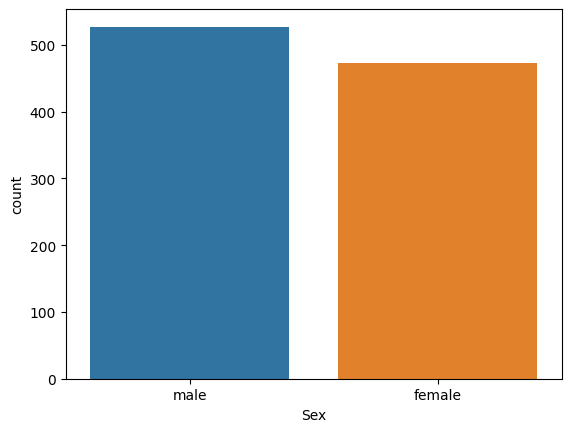

In [11]:
print(df["Sex"].value_counts()) 


sns.countplot(data=df,x="Sex")  

Embarked
Q    362
C    328
S    310
Name: count, dtype: int64


<Axes: xlabel='Embarked', ylabel='count'>

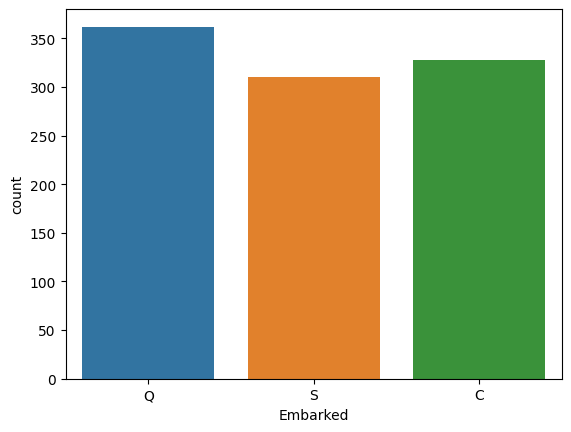

In [12]:
print(df["Embarked"].value_counts()) 


sns.countplot(data=df,x="Embarked")   

Survived
0    508
1    492
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

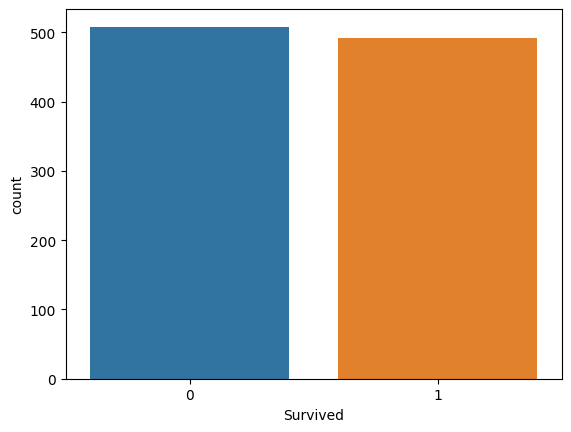

In [13]:
print(df["Survived"].value_counts()) 


sns.countplot(data=df,x="Survived")  

In [14]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Survived'],
      dtype='object')

In [15]:
num_col=["Age","SibSp","Parch"]

for col in num_col:
    print("=================================")
    print(f"The average {col} is ",df[col].mean())
    print(f"The minimum {col} is ",df[col].min())
    print(f"The maximum {col} is ",df[col].max())
    print(f"The standard deviation {col} is ",df[col].std())
  

The average Age is  38.458
The minimum Age is  1
The maximum Age is  79
The standard deviation Age is  23.103723033702124
The average SibSp is  2.032
The minimum SibSp is  0
The maximum SibSp is  4
The standard deviation SibSp is  1.4244314672896712
The average Parch is  2.005
The minimum Parch is  0
The maximum Parch is  4
The standard deviation Parch is  1.4103063369225723


==========Age==============


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


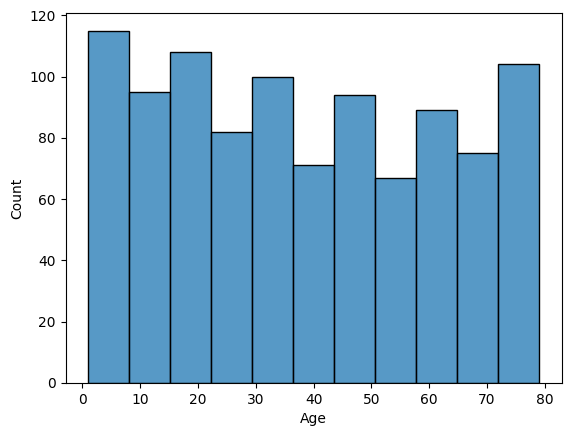

==========SibSp==============


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


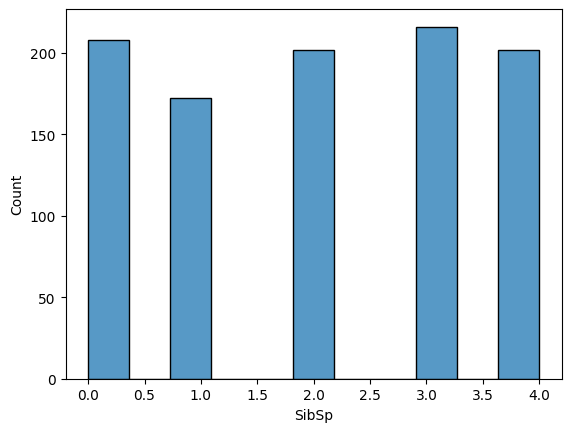

==========Parch==============


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


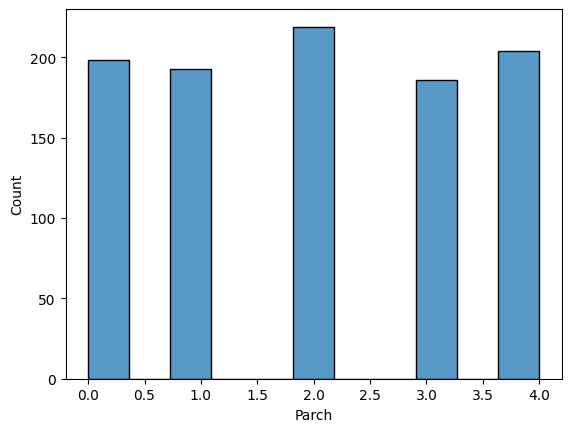

In [16]:
for col in num_col:
    print(f"=========={col}==============")
    sns.histplot(df[col])
    plt.show()

In [17]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


### Bivariate Analysis 

<Axes: xlabel='Survived', ylabel='count'>

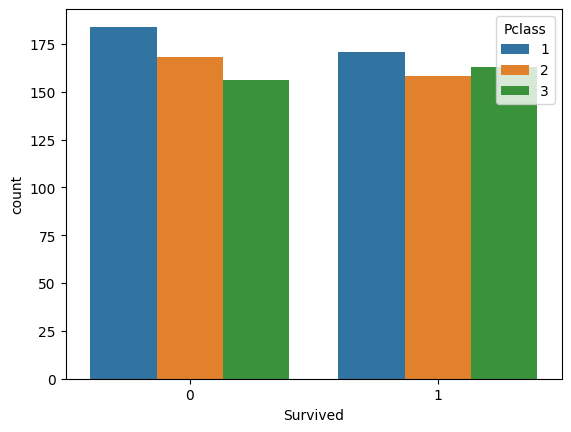

In [20]:
sns.countplot(data=df,x="Survived",hue="Pclass") 

In [31]:
df.groupby("Survived")["Pclass"].value_counts()  

Survived  Pclass
0         1         184
          2         168
          3         156
1         1         171
          3         163
          2         158
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

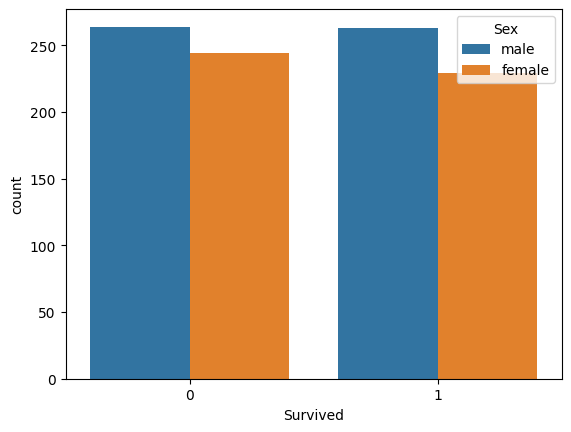

In [21]:
sns.countplot(data=df,x="Survived",hue="Sex") 

In [23]:
df.groupby("Survived")["Sex"].value_counts() 

Survived  Sex   
0         male      264
          female    244
1         male      263
          female    229
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

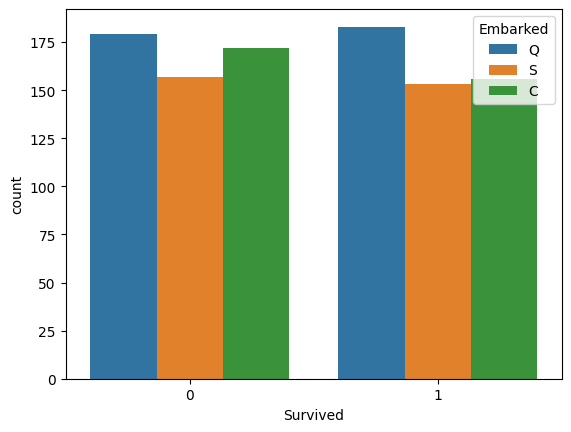

In [25]:
sns.countplot(data=df,x="Survived",hue="Embarked") 

In [26]:
df.groupby("Survived")["Embarked"].value_counts() 

Survived  Embarked
0         Q           179
          C           172
          S           157
1         Q           183
          C           156
          S           153
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='SibSp'>

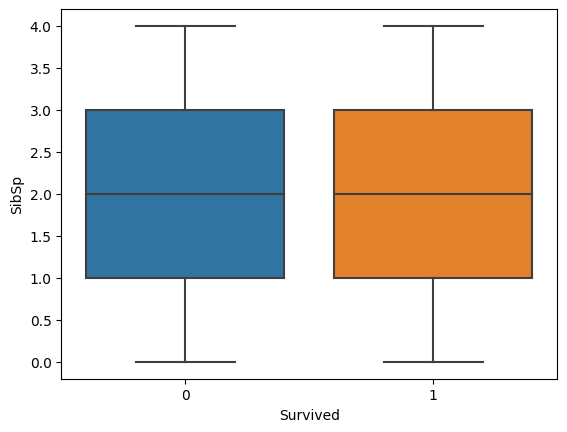

In [28]:
sns.boxplot(data=df,x="Survived",y="SibSp")

<Axes: xlabel='Survived', ylabel='Parch'>

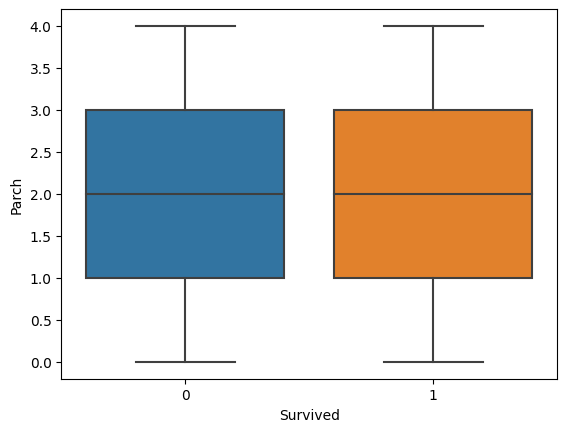

In [29]:
sns.boxplot(data=df,x="Survived",y="Parch")

<Axes: xlabel='Survived', ylabel='Fare'>

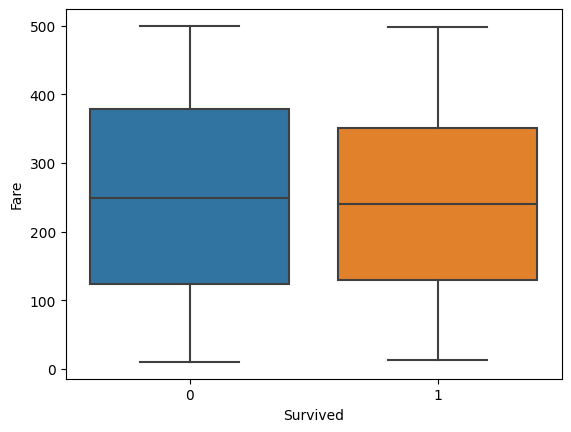

In [30]:
sns.boxplot(data=df,x="Survived",y="Fare") 

- **From above observation we can see that Pclas,Sex,Embarked,Fare are the columns which are somehow affecting the Survival.**  

In [83]:
# separating input and output variables 
X=df[["Pclass","Sex","Embarked","Fare"]] 
y=df["Survived"]

In [84]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape) 

(700, 4) (700,)
(300, 4) (300,)


In [85]:
X_train.head()

,Pclass,Sex,Embarked,Fare
105,3,female,Q,255.63
68,2,male,S,132.34
479,3,female,S,494.33
399,3,male,C,435.52
434,2,female,Q,50.93


In [86]:
X_train.dtypes

Pclass       object
Sex          object
Embarked     object
Fare        float64
dtype: object

In [87]:
X_train_cat=X_train.select_dtypes(include="object")
X_train_cat.head()

,Pclass,Sex,Embarked
105,3,female,Q
68,2,male,S
479,3,female,S
399,3,male,C
434,2,female,Q


In [88]:
X_train_num=X_train.select_dtypes(include="float64")
X_train_num.head() 

,Fare
105,255.63
68,132.34
479,494.33
399,435.52
434,50.93


In [89]:
#Data preprocessing on numerical features 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#putting X_train num transformed into a dataframe
X_train_num_transformed=pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns=X_train_num.columns,
                                    index=X_train_num.index)


X_train_num_transformed.head() 

,Fare
105,0.101593
68,-0.766542
479,1.782376
399,1.368271
434,-1.339782


In [90]:
#one hot encoding the categorical features
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first', sparse=False)

X_train_cat_onehot=pd.DataFrame(encoder.fit_transform(X_train_cat),
                                     columns=encoder.get_feature_names_out(X_train_cat.columns),
                                     index=X_train_cat.index) 

X_train_cat_onehot.head() 

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
105,0.0,1.0,0.0,1.0,0.0
68,1.0,0.0,1.0,0.0,1.0
479,0.0,1.0,0.0,0.0,1.0
399,0.0,1.0,1.0,0.0,0.0
434,1.0,0.0,0.0,1.0,0.0


In [91]:
X_train_transformed=pd.concat([X_train_num_transformed,X_train_cat_onehot],axis=1)
X_train_transformed.head() 

,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
105,0.101593,0.0,1.0,0.0,1.0,0.0
68,-0.766542,1.0,0.0,1.0,0.0,1.0
479,1.782376,0.0,1.0,0.0,0.0,1.0
399,1.368271,0.0,1.0,1.0,0.0,0.0
434,-1.339782,1.0,0.0,0.0,1.0,0.0


In [92]:
X_test_num=X_test.select_dtypes(include="float64")
X_test_num.head() 

,Fare
993,401.34
859,249.93
298,334.27
553,292.67
672,238.43


In [93]:
X_test_cat=X_test.select_dtypes(include="object")
X_test_cat.head() 

,Pclass,Sex,Embarked
993,3,female,Q
859,1,male,C
298,2,male,C
553,1,male,C
672,1,male,S


In [94]:
#previously we ahave already created scaler object for StandardScaler,we will use only the transform

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,Fare
993,1.127596
859,0.061457
298,0.655329
553,0.362407
672,-0.019519


In [95]:
#one hot encoding the categorical features



X_test_cat_onehot=pd.DataFrame(encoder.transform(X_test_cat),
                                     columns=encoder.get_feature_names_out(X_test_cat.columns),
                                     index=X_test_cat.index) 

X_test_cat_onehot.head() 

,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
993,0.0,1.0,0.0,1.0,0.0
859,0.0,0.0,1.0,0.0,0.0
298,1.0,0.0,1.0,0.0,0.0
553,0.0,0.0,1.0,0.0,0.0
672,0.0,0.0,1.0,0.0,1.0


In [96]:
X_test_transformed=pd.concat([X_test_num_transformed,X_test_cat_onehot],axis=1)
X_test_transformed.head() 

,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
993,1.127596,0.0,1.0,0.0,1.0,0.0
859,0.061457,0.0,0.0,1.0,0.0,0.0
298,0.655329,1.0,0.0,1.0,0.0,0.0
553,0.362407,0.0,0.0,1.0,0.0,0.0
672,-0.019519,0.0,0.0,1.0,0.0,1.0


- **Since this is a classification problem we are going to use classifiers to build our model.**

In [97]:
#using the logistic regression 
from sklearn.linear_model import LogisticRegression
classifier_logistic=LogisticRegression() 
classifier_logistic.fit(X_train_transformed,y_train) 

LogisticRegression()

In [98]:
#using KNN 
from sklearn.neighbors import KNeighborsClassifier 
classifier_knn=KNeighborsClassifier()
classifier_knn.fit(X_train_transformed,y_train) 

KNeighborsClassifier()

In [100]:
# using decision tree 
from sklearn.tree import DecisionTreeClassifier
classifier_tree=DecisionTreeClassifier()
classifier_tree.fit(X_train_transformed,y_train) 

DecisionTreeClassifier()

In [99]:
#using random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_forest=RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=3000,
                       random_state=42)
classifier_forest.fit(X_train_transformed,y_train)  

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=3000,
                       random_state=42)

### Predicting 

In [101]:
#for logistic regression classifier
y_test_pred_logistic=classifier_logistic.predict(X_test_transformed) 

#for Knn classifier
y_test_pred_knn=classifier_knn.predict(X_test_transformed) 

#for decision tree classifier 
y_test_pred_tree=classifier_tree.predict(X_test_transformed) 

#for random forest classifier 
y_test_pred_forest=classifier_forest.predict(X_test_transformed) 

### Evaluating 

In [102]:
from sklearn import metrics 

## for logistic regression classifier  model
print("for logistic regressor classifier model the accuracy is :",metrics.accuracy_score(y_test,y_test_pred_logistic))

#for knn classifier model
print("for Knn classifier model the accuracy is : ",metrics.accuracy_score(y_test,y_test_pred_knn))

# for decision tree classifier model
print("for decision tree classifier model the accuracy is : ",metrics.accuracy_score(y_test,y_test_pred_tree))

#for random forest classifier model
print("for random forest classifier model the accuracy is : ",metrics.accuracy_score(y_test,y_test_pred_forest))

for logistic regressor classifier model the accuracy is : 0.4166666666666667
for Knn classifier model the accuracy is :  0.52
for decision tree classifier model the accuracy is :  0.48333333333333334
for random forest classifier model the accuracy is :  0.5633333333333334


- **With Pclass,Sex,Embarked,Fare we have built the model using Random forest Classifier that predicts whether a person survives or not with 56.33 % accuracy** 